### Logistic Regression Task

기계 센서 데이터를 통해 고장 여부를 예측하는 분류기를 

In [1]:
import pandas as pd

m_df = pd.read_csv('./datasets/machine.csv')
m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9810,1604,29.5,14,0,0,0,0,0
9811,1632,31.8,17,0,0,0,0,0
9812,1645,33.4,22,0,0,0,0,0
9813,1408,48.5,25,0,0,0,0,0


In [2]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


In [3]:
m_df.duplicated().sum()

6

In [4]:
m_df = m_df.drop_duplicates()
m_df.duplicated().sum()

0

In [5]:
m_df.isna().sum()

Rotational speed [rpm]    0
Torque [Nm]               0
Tool wear [min]           0
TWF                       0
HDF                       0
PWF                       0
OSF                       0
Machine failure           0
dtype: int64

array([[<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'Machine failure'}>, <Axes: >]],
      dtype=object)

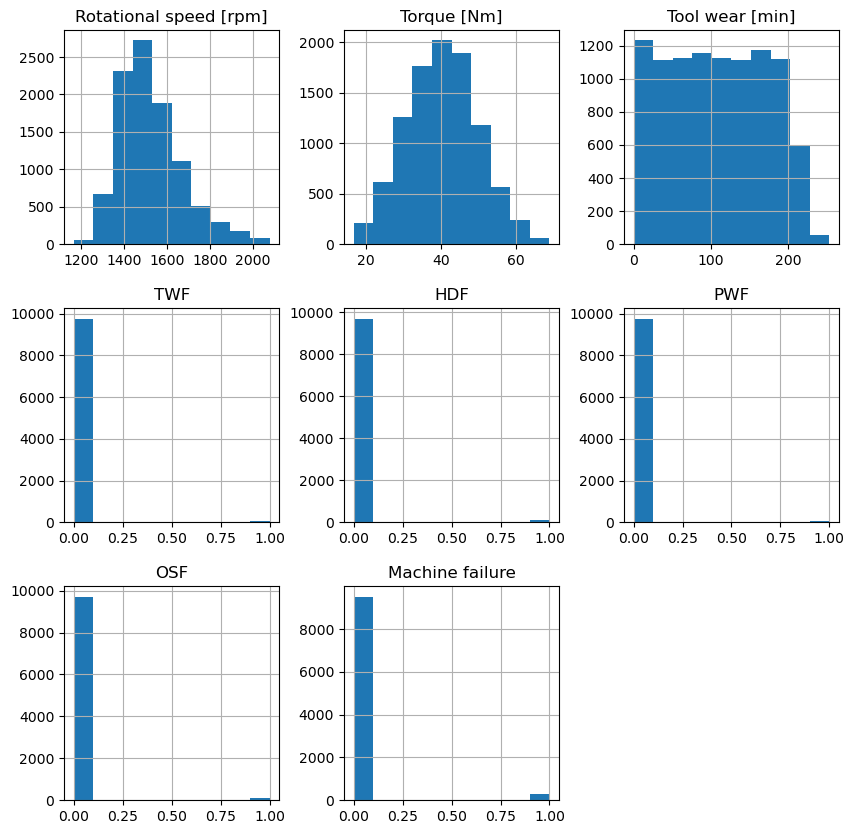

In [6]:
m_df.hist(figsize=(10,10))

In [7]:
m_df.TWF.value_counts()

TWF
0    9765
1      44
Name: count, dtype: int64

In [8]:
m_df.HDF.value_counts()

HDF
0    9694
1     115
Name: count, dtype: int64

In [9]:
m_df.PWF.value_counts()

PWF
0    9765
1      44
Name: count, dtype: int64

In [10]:
m_df.OSF.value_counts()

OSF
0    9715
1      94
Name: count, dtype: int64

In [11]:
m_df['Tool wear [min]'].value_counts()

Tool wear [min]
0      117
2       68
5       58
7       58
59      56
      ... 
237      1
239      1
241      1
251      1
253      1
Name: count, Length: 246, dtype: int64

In [12]:
m_df['Machine failure'].value_counts()

Machine failure
0    9523
1     286
Name: count, dtype: int64

In [13]:
m_0 = m_df[m_df['Machine failure'] == 0].sample(286, random_state=124)
m_1 = m_df[m_df['Machine failure'] == 1]
pre_m_df = pd.concat([m_0, m_1])

In [14]:
pre_m_df['Machine failure'].value_counts()

Machine failure
0    286
1    286
Name: count, dtype: int64

array([[<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'Machine failure'}>, <Axes: >]],
      dtype=object)

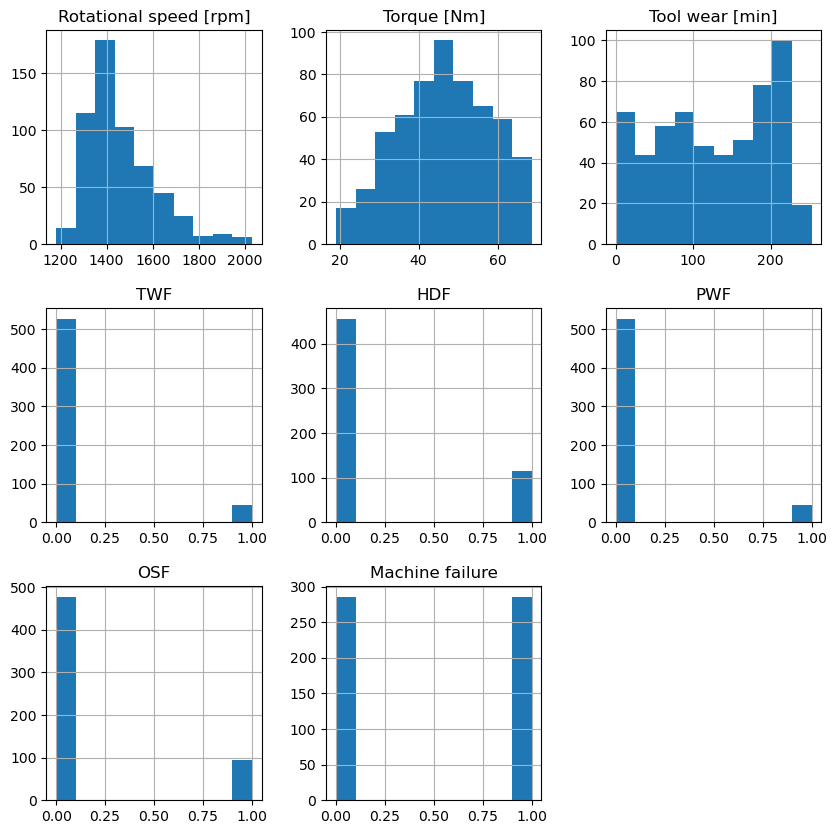

In [15]:
pre_m_df.hist(figsize=(10, 10))

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

#### **sklearn - LogisticRegression**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=0.01, random_state=124)
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)

오차 행렬
[[48 10]
 [12 45]]
정확도: 0.8087, 정밀도: 0.8182, 재현율: 0.7895, F1: 0.8036, ROC-AUC: 0.8085
################################################################################


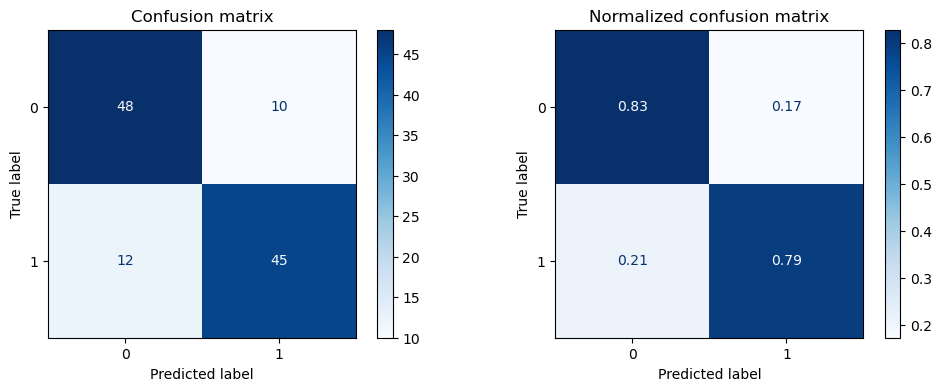

In [18]:
get_evaluation(y_test, prediction, logistic_r, X_test)

#### **pytorch**

In [19]:
import torch
import numpy as np
from torch.optim import SGD
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# print(X_train.shape, y_train.shape)

logistic_r = Sequential(
    Linear(7, 1), # 7개 input을 통해 결과 출력
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=1e-1)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)

    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss.item(), 4)}')
        print('=' * 90)

Epoch: 1000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 2000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 3000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 4000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 5000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 6000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 7000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 8000/10000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438

In [20]:
pre_m_df.corr()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
Rotational speed [rpm],1.000000,-0.871437,-0.033014,0.155094,-0.408902,-0.182534,-0.312854,-0.510421
Torque [Nm],-0.871437,1.000000,0.061241,-0.188613,0.293810,0.455115,0.435328,0.586769
Tool wear [min],-0.033014,0.061241,1.000000,0.362452,-0.134125,-0.110563,0.508124,0.335155
TWF,0.155094,-0.188613,0.362452,1.000000,-0.144811,-0.058712,-0.074902,0.288675
HDF,-0.408902,0.293810,-0.134125,-0.144811,1.000000,-0.095701,-0.151829,0.501638
PWF,-0.182534,0.455115,-0.110563,-0.058712,-0.095701,1.000000,0.013619,0.288675
OSF,-0.312854,0.435328,0.508124,-0.074902,-0.151829,0.013619,1.000000,0.443455
Machine failure,-0.510421,0.586769,0.335155,0.288675,0.501638,0.288675,0.443455,1.000000


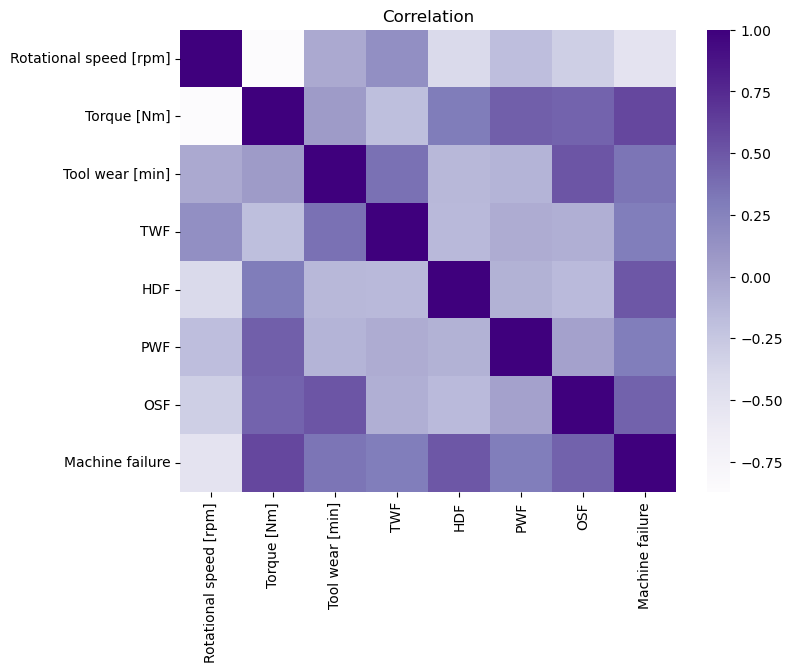

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = pre_m_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [22]:
corr['Machine failure'].sort_values(ascending=False)[1:]

Torque [Nm]               0.586769
HDF                       0.501638
OSF                       0.443455
Tool wear [min]           0.335155
TWF                       0.288675
PWF                       0.288675
Rotational speed [rpm]   -0.510421
Name: Machine failure, dtype: float64

In [23]:
pre_m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
6060,1527,45.3,8,0,0,0,0,0
2422,1524,40.4,131,0,0,0,0,0
4569,1594,35.5,13,0,0,0,0,0
8237,1671,31.8,108,0,0,0,0,0
3726,1356,48.3,36,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9489,1352,48.9,238,0,0,0,1,1
9583,1294,66.7,12,0,0,1,0,1
9641,1360,60.9,187,0,0,0,1,1
9649,1337,56.1,206,0,0,0,1,1


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [25]:
get_vif(features)

,vif_score,feature
0,17.292064,Rotational speed [rpm]
1,20.942339,Torque [Nm]
2,7.262241,Tool wear [min]
3,1.424932,TWF
4,1.822451,HDF
5,1.543529,PWF
6,2.504618,OSF


In [26]:
test_df = pre_m_df.drop(labels=['TWF'], axis=1)
test_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],HDF,PWF,OSF,Machine failure
6060,1527,45.3,8,0,0,0,0
2422,1524,40.4,131,0,0,0,0
4569,1594,35.5,13,0,0,0,0
8237,1671,31.8,108,0,0,0,0
3726,1356,48.3,36,0,0,0,0
...,...,...,...,...,...,...,...
9489,1352,48.9,238,0,0,1,1
9583,1294,66.7,12,0,1,0,1
9641,1360,60.9,187,0,0,1,1
9649,1337,56.1,206,0,0,1,1


In [27]:
features, targets = test_df.iloc[:, :-1], test_df.iloc[:, -1]

In [28]:
get_vif(features)

,vif_score,feature
0,17.240773,Rotational speed [rpm]
1,20.858915,Torque [Nm]
2,5.758855,Tool wear [min]
3,1.801192,HDF
4,1.543080,PWF
5,2.323770,OSF


In [29]:
test_df = pre_m_df.drop(labels=['Tool wear [min]', 'TWF', 'PWF'], axis=1)
test_df

,Rotational speed [rpm],Torque [Nm],HDF,OSF,Machine failure
6060,1527,45.3,0,0,0
2422,1524,40.4,0,0,0
4569,1594,35.5,0,0,0
8237,1671,31.8,0,0,0
3726,1356,48.3,0,0,0
...,...,...,...,...,...
9489,1352,48.9,0,1,1
9583,1294,66.7,0,0,1
9641,1360,60.9,0,1,1
9649,1337,56.1,0,1,1


In [30]:
features, targets = test_df.iloc[:, :-1], test_df.iloc[:, -1]

In [31]:
get_vif(features)

,vif_score,feature
0,11.131173,Rotational speed [rpm]
1,14.681669,Torque [Nm]
2,1.572662,HDF
3,1.634984,OSF


In [34]:
import torch
import numpy as np
from torch.optim import SGD
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = test_df.iloc[:, :-1], test_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# print(X_train.shape, y_train.shape)

logistic_r = Sequential(
    Linear(4, 1), # 7개 input을 통해 결과 출력
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=1e-10)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)

    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss.item(), 4)}')
        print('=' * 90)

Epoch: 1000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 2000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 3000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 4000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 5000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 6000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 7000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 8000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 9000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
Epoch: 10000/10000
W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0
Loss: 50.1094
